In [14]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [15]:
#reading csv file
data=pd.read_csv('cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [19]:
# The age is given in days, we have to convert it into years.
data['age']=data["age"]/365
data['age']=data['age'].astype('int')


In [20]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [21]:
# Dropping id column, its of no use.
data = data.drop(columns = ["id"])

# Exploratory Data Analysis

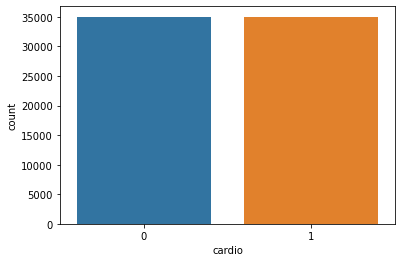

In [22]:
#To check data balanced or not
sns.countplot(x='cardio', data=data)

Text(0.5, 1.0, 'Visualization of outliers')

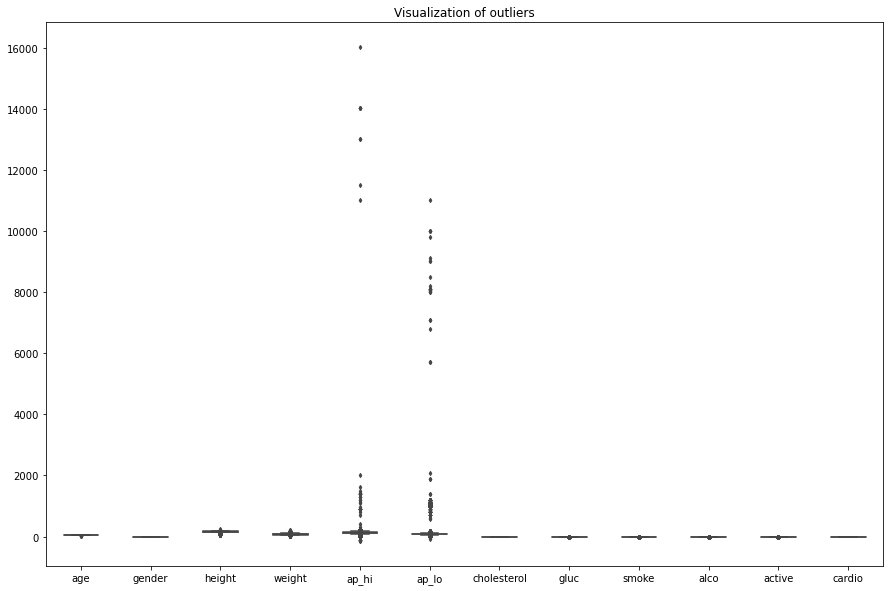

In [23]:
#to check outlier using boxplot
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers")

In [24]:
data['height'].unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182,  76,
       149, 142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143,
       196, 138, 194, 190, 134, 136, 100, 120, 189, 137, 192, 122, 250,
       191, 117,  70,  97, 119, 130, 110, 193,  75, 132,  71, 135,  67,
       125, 139, 133,  74,  98, 112, 207,  68,  55,  81,  80,  64,  91,
        60, 109,  72, 197,  65, 128, 105, 108, 200, 104, 111, 113,  96,
       131,  59,  66,  99,  57], dtype=int64)

In [25]:
data['weight'].unique()

array([ 62.  ,  85.  ,  64.  ,  82.  ,  56.  ,  67.  ,  93.  ,  95.  ,
        71.  ,  68.  ,  80.  ,  60.  ,  78.  , 112.  ,  75.  ,  52.  ,
        83.  ,  69.  ,  90.  ,  45.  ,  65.  ,  59.  ,  66.  ,  74.  ,
       105.  ,  73.  ,  55.  ,  70.  ,  72.  ,  63.  ,  50.  , 107.  ,
        84.  ,  77.  ,  79.  ,  76.  ,  58.  , 115.  ,  97.  ,  53.  ,
        57.  ,  49.  , 110.  ,  94.  ,  92.  ,  87.  , 103.  ,  88.  ,
        99.  , 100.  ,  61.  ,  48.  ,  54.  ,  51.  ,  47.  ,  91.  ,
       104.  ,  81.  ,  98.  , 108.  ,  89.  , 101.  ,  86.  ,  65.5 ,
       142.  ,  96.  ,  44.  ,  41.  , 169.  , 116.  , 200.  ,  64.8 ,
       120.  , 117.  , 125.  , 106.  , 114.  , 113.  , 129.  , 124.  ,
        42.  , 123.  , 111.  , 102.  , 109.  ,  46.  , 139.  , 150.  ,
       138.  , 131.  ,  43.  ,  83.6 , 134.  , 106.5 , 121.  ,  40.  ,
       141.  , 119.  , 126.  , 177.  , 165.  , 122.  ,  62.3 , 118.  ,
        89.5 , 132.  , 155.  , 130.  , 159.  ,  84.6 , 140.  ,  82.3 ,
      

In [26]:
data['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [27]:
data['ap_lo'].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

In [28]:
# ap_hi greater than 200 and lower than or equal to 80 will be removed.
# ap_lo greater than 180 and lower than 50 will be removed.
# height greater or equal to 100 and weight less than 28 will be removed.
outlier = ((data["ap_hi"]>200) | (data["ap_lo"]>180) | (data["ap_lo"]<50) | (data["ap_hi"]<=80) | (data["height"]<=100) | (data["weight"]<=28) )
print("There is {} outlier".format(data[outlier]["cardio"].count()))

There is 1451 outlier


#1451 outliers are nearly 2% of data 70000 records so the remaining data is enough for training

In [29]:
# Removing  the outlier from the Dataset.
data = data[~outlier]

In [30]:
data.shape

(68549, 12)

Text(0.5, 1.0, 'Visualization of outliers')

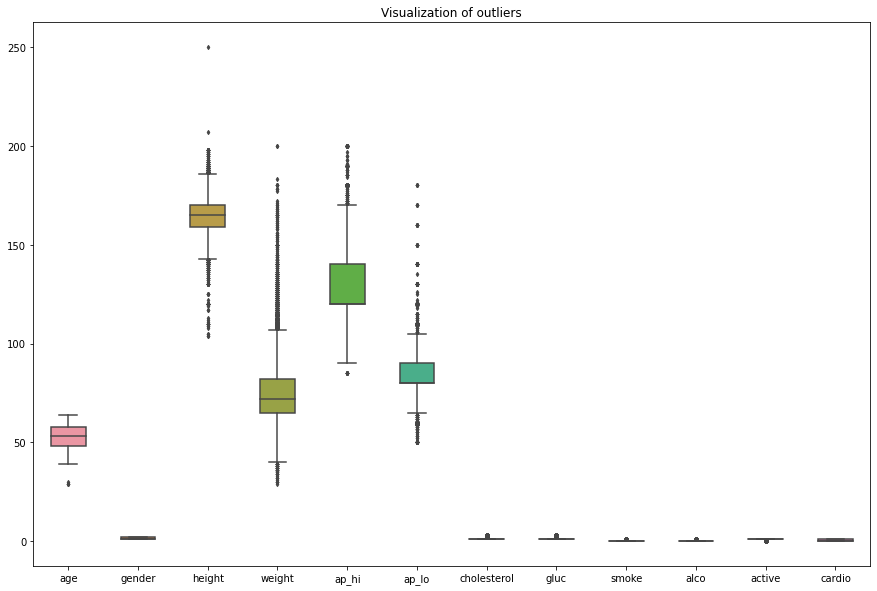

In [31]:
# BoxPlot after removing the outliers.
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers")

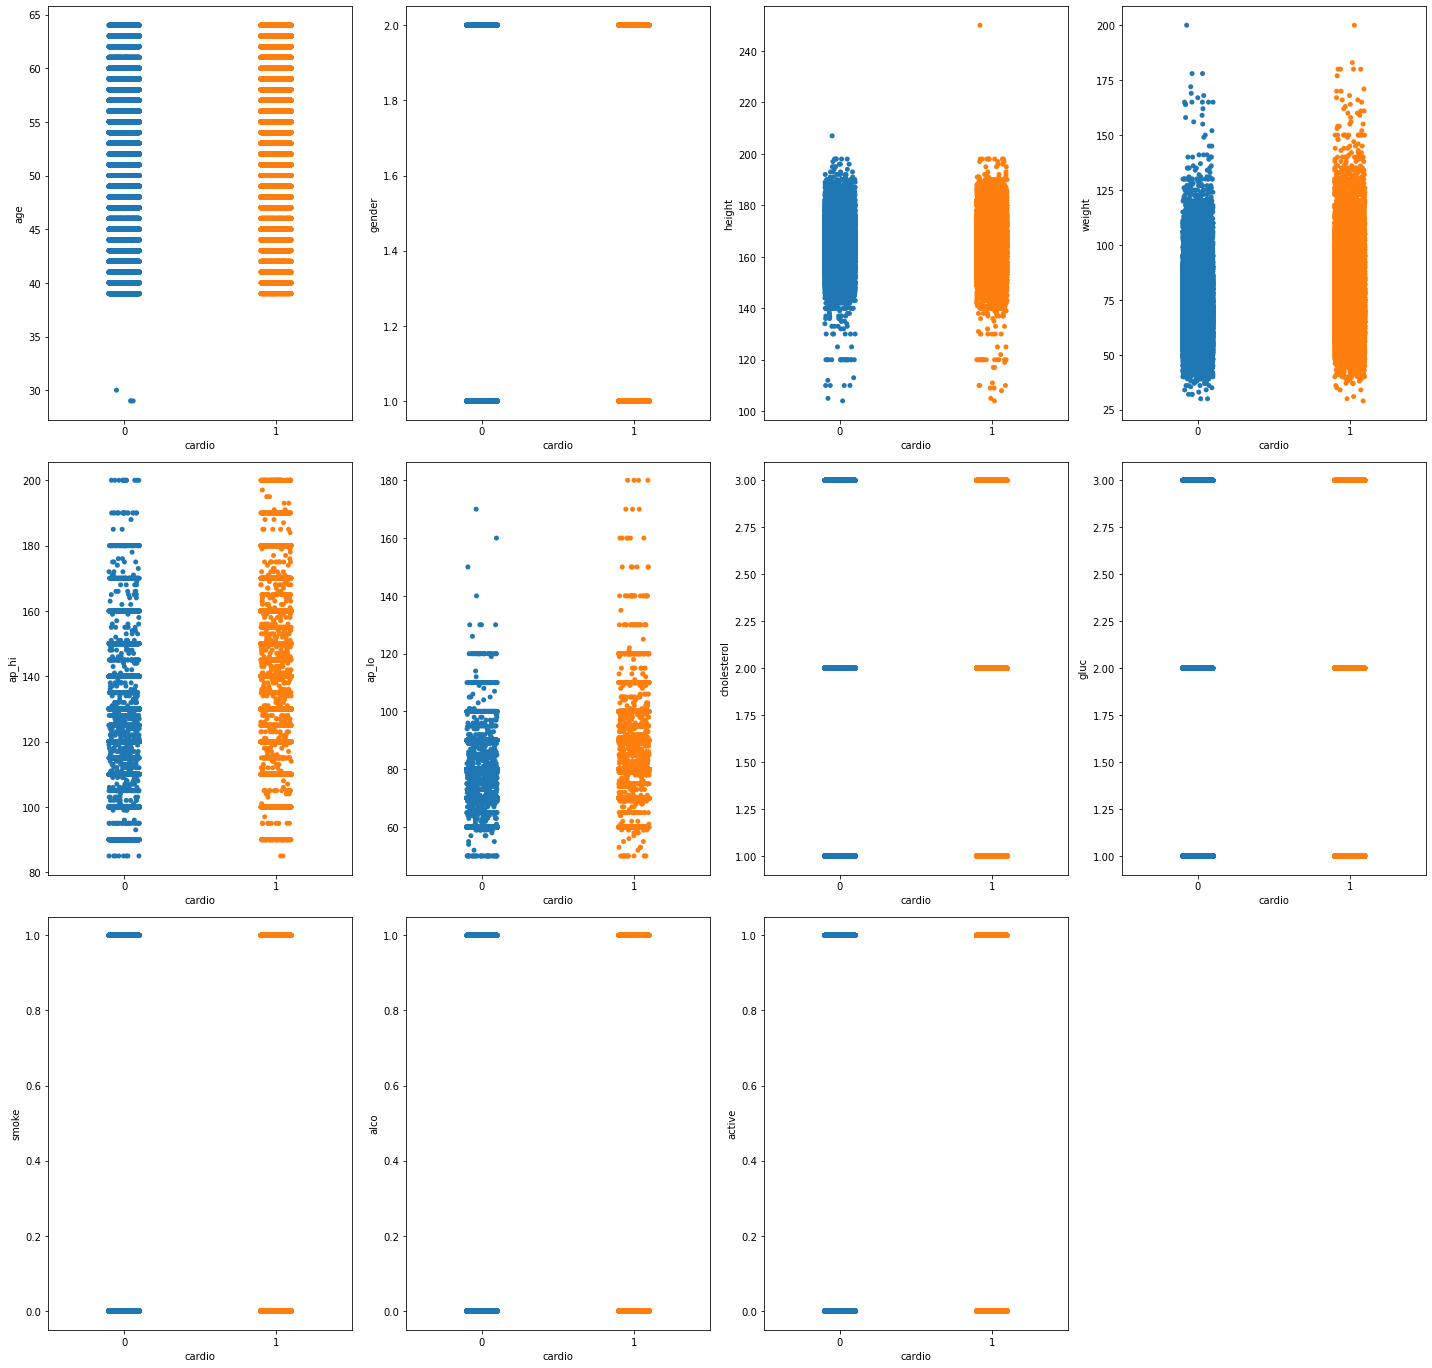

In [32]:
X = data.drop(columns = ['cardio'])
y = data['cardio']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1

plt.tight_layout()

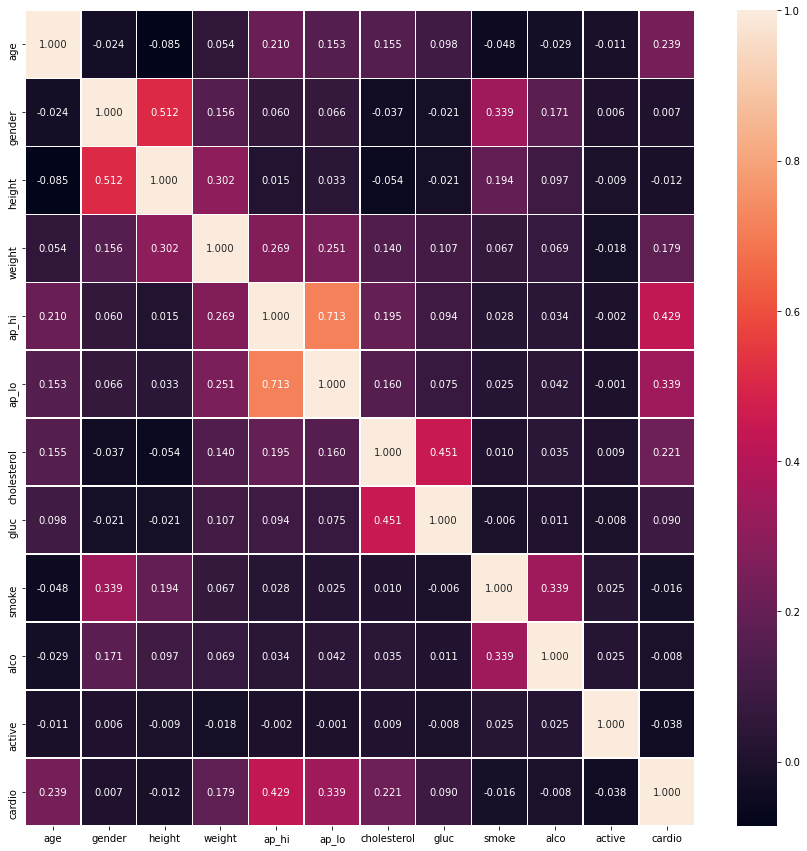

In [33]:
#creating heatmap for checking correlation
corr = data.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

#Body Mass Index (BMI) Height and weight seems uncorrelated with the cardio feature but Body Mass Index (BMI) could be helpful to train our mode

In [37]:

#Body Mass Index is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared.
#A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9.
data["bmi"] = data["weight"]/ (data["height"]/100)**2

In [38]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [41]:
# Detecting Genders
a = data[data["gender"]==1]["height"].mean()
b = data[data["gender"]==2]["height"].mean()
if a > b:
    gender1 = "male"
    gender2 = "female"
else:
    gender1 = "female"
    gender2 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender2)

Gender:1 is female & Gender:2 is male


In [42]:
data['gender']=data['gender']%2

In [43]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,0,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,0,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [44]:
X = data.drop(columns = ['cardio'])
y = data['cardio']

In [45]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(X)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

# Preparing the Training and Test set.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 9)

In [97]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=80)
svm = SVC()

In [98]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm}
scores= { }

In [99]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [100]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.732166
KNN,0.728957
Random forest,0.704060
Decision tree,0.631024


In [101]:
from sklearn.metrics import plot_roc_curve

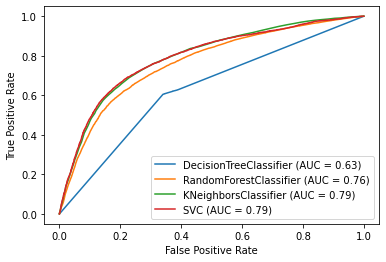

In [102]:
disp = plot_roc_curve(dtc, X_test, y_test)

plot_roc_curve(ran,X_test, y_test, ax = disp.ax_)

plot_roc_curve(knn,X_test, y_test, ax = disp.ax_)

plot_roc_curve(svm,X_test, y_test, ax = disp.ax_)

# Evaluation of svc

In [54]:
predicted_svc=svm.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, predicted_svc)
print("The accuracy of svc model is : ", accuracy)

The accuracy of svc model is :  0.7321663019693654


In [58]:
conf_mat = confusion_matrix(y_test, predicted_svc)
print("The Confusion Matrix for SVC in this dataset is : \n", conf_mat)

The Confusion Matrix for SVC in this dataset is : 
 [[8201 2149]
 [3359 6856]]


In [59]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [60]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("The precision of this svc model is : ",Precision)

# Recall
Recall= true_positive/(true_positive+false_negative)
print("The Recall score of svc model is : ",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this svc model is :  0.7923671497584541
The Recall score of svc model is :  0.7094290657439446
The F1_Score for this dataset is :  0.7486079415791875


# Evalution of knn

In [61]:
predicted_knn=knn.predict(X_test)

In [62]:
accuracy=accuracy_score(y_test,predicted_knn)
print("The accuracy of knn model is : ",accuracy)

The accuracy of knn model is :  0.7288110867979577


In [63]:
conf_mat = confusion_matrix(y_test,predicted_knn)
print("The Confusion Matrix for KNN in this dataset is : \n",conf_mat)

The Confusion Matrix for KNN in this dataset is : 
 [[8035 2315]
 [3262 6953]]


In [64]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [65]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("The precision of this knn model is : ",Precision)

# Recall
Recall= true_positive/(true_positive+false_negative)
print("The Recall score of knn model is : ",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this knn model is :  0.7763285024154589
The Recall score of knn model is :  0.7112507745419138
The F1_Score for this dataset is :  0.742366147734097


# Conclusion

SVC gives a better result than other models,in terms of Accuracy score,Auc score and F1_score Svc gives good result. so we can take svc to predict whether a person has cardio or not with good accuracy of 73%.¶

In [103]:
#rf=RandomForestClassifier(criterion= 'gini',max_depth= 5,min_samples_leaf= 3,min_samples_split= 3)

In [68]:
#rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3)

In [69]:
#rf.score(X_test,y_test)

0.7299294918550936

In [79]:
#param_grid={
#    
#    'C': [0.1, 1, 10, 100, 1000],  
#    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#    'kernel': ['rbf']
#}

In [80]:
#gridsearch=GridSearchCV(SVC(random_state=6),param_grid=param_grid,cv=5)

In [81]:
#gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=6),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [82]:
#gridsearch.best_estimator_

SVC(C=1000, gamma=0.1, random_state=6)

In [83]:
#gridsearch.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [84]:
#gridsearch.best_score_

0.7320355729826123